Este colab fue desarrollado por Arnold Charry Armero.

# Farmer Jane

La granjera Jane posee 45 acres de tierra. ella va a plantar
cada uno con trigo o maíz. Cada acre plantada con trigo
produce una ganancia de $\$200$; cada uno con maíz produce una ganancia de $\$300$.
La mano de obra y los fertilizantes utilizados por cada acre se dan en la Tabla 1.
Se dispone de cien trabajadores y 120 toneladas de fertilizante.
Utilice programación lineal para determinar cómo Jane puede maximizar las ganancias de su tierra.

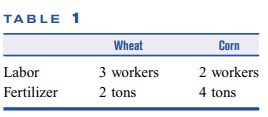

## Conjuntos

$ i = \text{tipo de acre }i$

## Parámetros

$ T = \textrm{Número de trabajadores totales} $

$ E = \textrm{Acres de tierra disponible para sembrar }  $

$ F = \textrm{Toneladas de fertilizantes máximos disponibles }  $

$ U_{i} = \textrm{Utilidad que genera vender el acre tipo }  i$

$ W_{i} = \textrm{Trabajadores necesarios para el acre tipo }  i$

$ L_{i} = \textrm{Fertilizante necesario para producir el acre tipo }  i$

## Variables de decisión

$ x_{i} = \textrm{unidades a producir de acres de tipo } i$

## Función objetivo

$$ \textrm{Max } z = \sum_{i = 1}^{n} U_{i} \: x_{i}  $$

## Restricciones

Hay un máximo de 45 acres de tierra,

$$ \sum_{i = 1}^{n} x_{i} \leq E $$

No se puede rebasar el número de trabajadores totales,

$$ \sum_{i = 1}^{n} W_{i} x_{i} \leq T$$

No se puede rebasar el fertilizante total,

$$ \sum_{i = 1}^{n} L_{i} x_{i} \leq F$$

In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 35.4 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [3]:
#Conjuntos
acres = range(2)

In [4]:
#Parámetros
U = [200, 300]

W = [3, 2]

L = [2, 4]

E = 45

T = 100

F = 120

In [6]:
#Se crea la instancia del modelo
model = LpProblem(name = "Farmer_Jane", sense = LpMaximize)

#Inicialización de las variables de decisión
X = LpVariable.dicts("X", (acres), 0, None, LpContinuous)

#Se agrega la función objetivo
model += lpSum([U[i] * X[i] for i in acres])

#Restricciones

#No se puede rebasar la mano de obra
model += lpSum([W[i] * X[i] for i in acres]) <= T

#No se puede rebasar el número de acres de tierra
model += lpSum([X[i] for i in acres]) <= E

#No se puede rebasar el número de fertilizantes
model += lpSum([L[i] * X[i] for i in acres]) <= F

#Se resuelve el modelo
model.solve()

#Se imprime el status del problema
print("Status", LpStatus[model.status])

#Se imprimen las variables
for v in model.variables():
  print(v.name, "=", v.varValue)

#Se imprime la función objetivo
print("Utilidades totales =", value(model.objective))

Status Optimal
X_0 = 20.0
X_1 = 20.0
Utilidades totales = 10000.0
